Data preparations:
Download the dataset from http://ufldl.stanford.edu/housenumbers/train_32x32.mat. This
is the training dataset of “The Street View House Numbers (SVHN) Dataset”. This
dataset is similar to MNIST used in our previous classes. All images have been cropped
and resized to 32-by-32 pixels. There are 73257 images in total and 10 classes, 1 for
each digit: Digit '1' has label 1, '9' has label 9, and '0' has label 10.
Tasks:

1. Load it using scipy.io.loadmat. You get a python dictionary after loading the downloaded
“train_32x32.mat”. Get the data X and the label y from the dictionary. The shape of X
should be (32, 32, 3, 73257) and the shape of y should be (73257, 1). Each x[:, :, :, i]
refers to one image and y[i] refers to the corresponding label.

In [50]:
import scipy.io
import numpy as np

# Loading the dataset
data = scipy.io.loadmat('train_32x32.mat')

# Extracting the data and label
X = data['X']
y = data['y']

# Checking the shape of the data and label
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (32, 32, 3, 73257)
Shape of y: (73257, 1)


Above Shapes match the given.
* Shape of X: (32, 32, 3, 73257)
* Shape of y: (73257, 1)

2. Split the data into the training data, the validation data, and the testing data as
80%/10%/10% of all the data. You can use the sklearn preprocessing module to do this.
Again, use the training data to train your classifier; use the validation data to choose
your best model; use the test data to evaluate your chosen model.

In [51]:
from sklearn.model_selection import train_test_split

X = np.transpose(X, (3, 0, 1, 2)) # Reshaping X

# Splitting the data into training and test sets (80/20 split) using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the test set into validation and test sets (50/50 split) using sklearn
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Checking shapes
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (58605, 32, 32, 3)
Shape of y_train: (58605, 1)
Shape of X_val: (7326, 32, 32, 3)
Shape of y_val: (7326, 1)
Shape of X_test: (7326, 32, 32, 3)
Shape of y_test: (7326, 1)


3. Visualize at least 10 images of the training data along with their labels. Ensure at least 1
image from class is visualized. You can use imshow function from matplotlib.pyplot.
Compare them to the MNIST image. You can load MNIST data from your colab folder
“sample_data”.

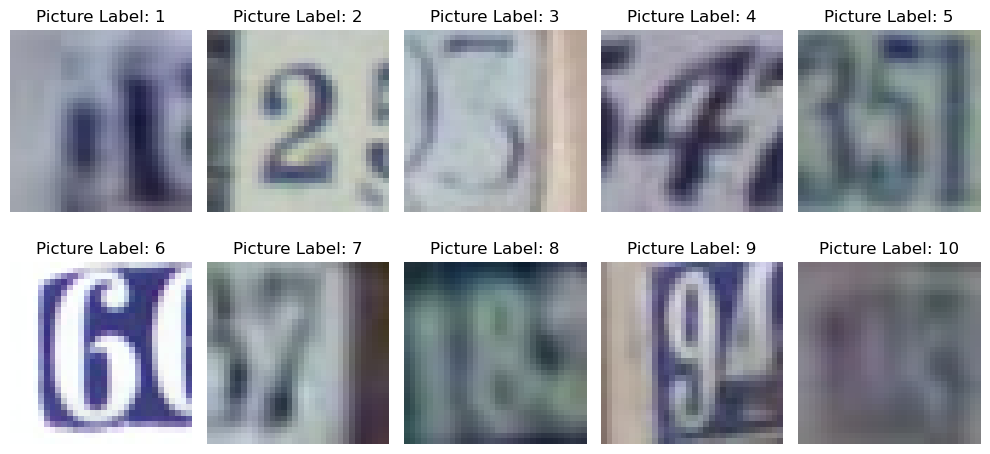

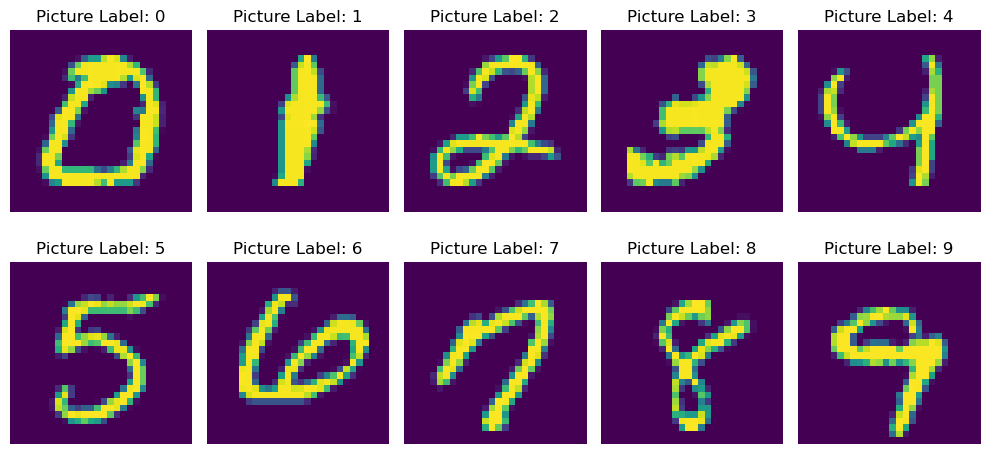

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating function (more convineant than retyping the whole code)
def display_images(images, labels):
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    axes = axes.ravel()

    for i in range(len(images)):
        axes[i].imshow(images[i])
        axes[i].set_title(f"Picture Label: {labels[i]}")
        axes[i].axis("off")
    plt.tight_layout()
    plt.show()

# Selecting images with unique labels from the data. This would help us get at least 1 image from every calss.
labels, indices = np.unique(y_train, return_index=True)
images = X_train[indices]

# Displaying the images with labels
display_images(images, labels)

# Loading MNIST
mnist_train_data = pd.read_csv("mnist_train_small.csv", header=None)
mnist_X_train = np.array(mnist_train_data.iloc[:, 1:]).reshape(-1, 28, 28)
mnist_y_train = np.array(mnist_train_data.iloc[:, 0])

# Selecting MNIST images with unique labels from the data. This would help us get at least 1 image from every calss.
mnist_labels, mnist_indices = np.unique(mnist_y_train, return_index=True)
mnist_images = mnist_X_train[mnist_indices]

# Displaying the images with labels
display_images(mnist_images, mnist_labels)

4. Use sklearn.linear_model.RidgeClassifier to train a classifier for SVHN and show training
accuracy, validation accuracy, testing accuracy. Use different alphas in the setting to see
the highest validation accuracy you can achieve and the corresponding testing accuracy
on the same model.

In [53]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

# Creating a function to flatten the images
def flatten_images(X):
    return X.reshape(X.shape[0], -1)

# Flattening the images
X_train_flat = flatten_images(X_train)
X_val_flat = flatten_images(X_val)
X_test_flat = flatten_images(X_test)

# Defining alpha
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Initializing
best_alpha = None
best_val_accuracy = 0
best_model = None

# Training and evaluating RidgeClassifier for different alpha values
for alpha in alphas:
    ridge_clf = RidgeClassifier(alpha=alpha)
    ridge_clf.fit(X_train_flat, y_train.ravel())
    
    # Computing ther training and validation accuracies
    train_accuracy = accuracy_score(y_train, ridge_clf.predict(X_train_flat))
    val_accuracy = accuracy_score(y_val, ridge_clf.predict(X_val_flat))
    
    print(f"Alpha: {alpha}, Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")
    
    # Updating the validation accuracy, best alpha, and best model
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_alpha = alpha
        best_model = ridge_clf

# Testing the best model
test_accuracy = accuracy_score(y_test, best_model.predict(X_test_flat))
print(f"\nBest Alpha: {best_alpha}, Test Accuracy: {test_accuracy}")

Alpha: 0.001, Training Accuracy: 0.3463868270625373, Validation Accuracy: 0.23669123669123668
Alpha: 0.01, Training Accuracy: 0.3463868270625373, Validation Accuracy: 0.23669123669123668
Alpha: 0.1, Training Accuracy: 0.3463868270625373, Validation Accuracy: 0.23669123669123668
Alpha: 1, Training Accuracy: 0.3463868270625373, Validation Accuracy: 0.23669123669123668
Alpha: 10, Training Accuracy: 0.34631857350055456, Validation Accuracy: 0.23655473655473655
Alpha: 100, Training Accuracy: 0.34669396809145975, Validation Accuracy: 0.23682773682773683

Best Alpha: 100, Test Accuracy: 0.2304122304122304


Best Alpha: 100, Test Accuracy: 0.23

5. Use sklearn.neural_network.MLPClassifier to train a classifier for SVHN and show
training accuracy, validation accuracy, testing accuracy. Use different hidden_layer_sizes
and learning_rate_init in the setting to see the highest validation accuracy you can
achieve and the corresponding testing accuracy on the same model. Hint: set the
“verbose” argument in the module to “True” to see the loss change for each iteration.

In [54]:
from sklearn.neural_network import MLPClassifier

# Defining the hidden layer sizes and learning rates to test
hidden_layer_sizes = [(32,), (64,), (128,)]
learning_rates = [0.001, 0.01, 0.1]

# Initializing
best_hls = None
best_lr = None
best_val_accuracy = 0
best_model = None

# Training and evaluating MLPClassifier for different hidden layer sizes and learning rates
for hls in hidden_layer_sizes:
    for lr in learning_rates:
        # Creating MLPClassifier object
        mlp_clf = MLPClassifier(hidden_layer_sizes=hls, learning_rate_init=lr, verbose=True, max_iter=100, random_state=42)
        # Fitting
        mlp_clf.fit(X_train_flat, y_train.ravel())
        
        # Evaluating the performance on training and validation sets
        train_accuracy = accuracy_score(y_train, mlp_clf.predict(X_train_flat))
        val_accuracy = accuracy_score(y_val, mlp_clf.predict(X_val_flat))
        
        print(f"\nHidden Layer Sizes: {hls}, Learning Rate: {lr}, Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")
        
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_hls = hls
            best_lr = lr
            best_model = mlp_clf

# Testing the best model
test_accuracy = accuracy_score(y_test, best_model.predict(X_test_flat))
print(f"\nBest Hidden Layer Sizes: {best_hls}, Best Learning Rate: {best_lr}, Test Accuracy: {test_accuracy}")

Iteration 1, loss = 2.82059889
Iteration 2, loss = 2.25223221
Iteration 3, loss = 2.24132492
Iteration 4, loss = 2.23841455
Iteration 5, loss = 2.23772184
Iteration 6, loss = 2.23761157
Iteration 7, loss = 2.23759004
Iteration 8, loss = 2.23757293
Iteration 9, loss = 2.23760799
Iteration 10, loss = 2.23756845
Iteration 11, loss = 2.23758284
Iteration 12, loss = 2.23758616
Iteration 13, loss = 2.23758957
Iteration 14, loss = 2.23759788
Iteration 15, loss = 2.23758410
Iteration 16, loss = 2.23759148
Iteration 17, loss = 2.23758526
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

Hidden Layer Sizes: (32,), Learning Rate: 0.001, Training Accuracy: 0.18795324631004182, Validation Accuracy: 0.1966966966966967
Iteration 1, loss = 2.82660234
Iteration 2, loss = 2.23795320
Iteration 3, loss = 2.23807032
Iteration 4, loss = 2.23820582
Iteration 5, loss = 2.23817016
Iteration 6, loss = 2.23817964
Iteration 7, loss = 2.23816212
Iteration 8, loss = 2.238178

6. Use another model (e.g., sklearn.linear_model.SGDClassifier, sklearn.svm.LinearSVC,
etc.). Try to change the arguments and see whether you can have a better testing
accuracy compared to the previous questions.

In [55]:
from sklearn.linear_model import SGDClassifier

# Defining the alpha values to test
alphas = [0.0001, 0.001, 0.01]
eta0s = [0.01, 0.1]

# Initialization
best_alpha = None
best_lr = None
best_eta0 = None
best_val_accuracy = 0
best_model = None

# Training and evaluating SGDClassifier for different alpha values and optimal learning rate
for alpha in alphas:
    sgd_clf = SGDClassifier(alpha=alpha, learning_rate='optimal', random_state=42)
    sgd_clf.fit(X_train_flat, y_train.ravel())

    train_accuracy = accuracy_score(y_train, sgd_clf.predict(X_train_flat))
    val_accuracy = accuracy_score(y_val, sgd_clf.predict(X_val_flat))

    print(f"Alpha: {alpha}, Learning Rate: optimal, Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_alpha = alpha
        best_lr = 'optimal'
        best_eta0 = None
        best_model = sgd_clf

# Training and evaluating SGDClassifier for different alpha values, adaptive learning rate, and eta0 values
for alpha in alphas:
    for eta0 in eta0s:
        sgd_clf = SGDClassifier(alpha=alpha, learning_rate='adaptive', eta0=eta0, random_state=42)
        sgd_clf.fit(X_train_flat, y_train.ravel())

        train_accuracy = accuracy_score(y_train, sgd_clf.predict(X_train_flat))
        val_accuracy = accuracy_score(y_val, sgd_clf.predict(X_val_flat))

        print(f"Alpha: {alpha}, Learning Rate: adaptive, eta0: {eta0}, Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_alpha = alpha
            best_lr = 'adaptive'
            best_eta0 = eta0
            best_model = sgd_clf # The best model is being selected based on the validation accuracy score.

# Testing the best model
test_accuracy = accuracy_score(y_test, best_model.predict(X_test_flat))
print(f"\nBest Alpha: {best_alpha}, Best Learning Rate: {best_lr}, Best eta0: {best_eta0}, Test Accuracy: {test_accuracy}")


Alpha: 0.0001, Learning Rate: optimal, Training Accuracy: 0.22100503370019622, Validation Accuracy: 0.18372918372918373
Alpha: 0.001, Learning Rate: optimal, Training Accuracy: 0.19233853766743453, Validation Accuracy: 0.15943215943215944
Alpha: 0.01, Learning Rate: optimal, Training Accuracy: 0.17344936438870404, Validation Accuracy: 0.14086814086814087
Alpha: 0.0001, Learning Rate: adaptive, eta0: 0.01, Training Accuracy: 0.2682194352017746, Validation Accuracy: 0.19150969150969152
Alpha: 0.0001, Learning Rate: adaptive, eta0: 0.1, Training Accuracy: 0.26820237181127893, Validation Accuracy: 0.18823368823368825
Alpha: 0.001, Learning Rate: adaptive, eta0: 0.01, Training Accuracy: 0.24219776469584506, Validation Accuracy: 0.16107016107016106
Alpha: 0.001, Learning Rate: adaptive, eta0: 0.1, Training Accuracy: 0.2591929016295538, Validation Accuracy: 0.17663117663117664
Alpha: 0.01, Learning Rate: adaptive, eta0: 0.01, Training Accuracy: 0.18774848562409352, Validation Accuracy: 0.1351

7. Use sklearn.cluster.KMeans (or any other cluster module you have tried) to cluster the
validation dataset. For better visualization, apply PCA to reduce the data dimension into
2 and scatter a subset of 1000 examples. Compare the clustering result with the
groundtruth (true label distribution). Hint: You may find them very different.

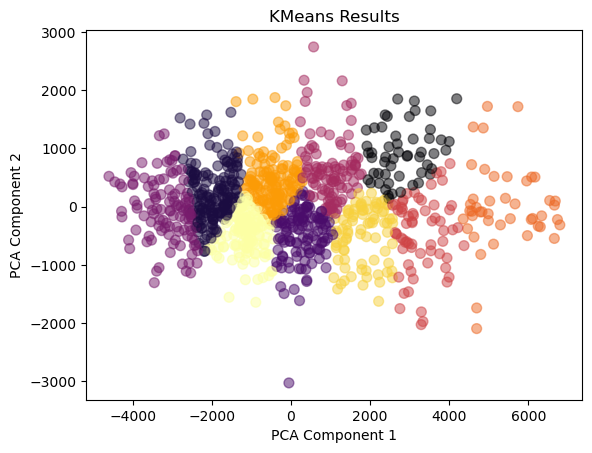

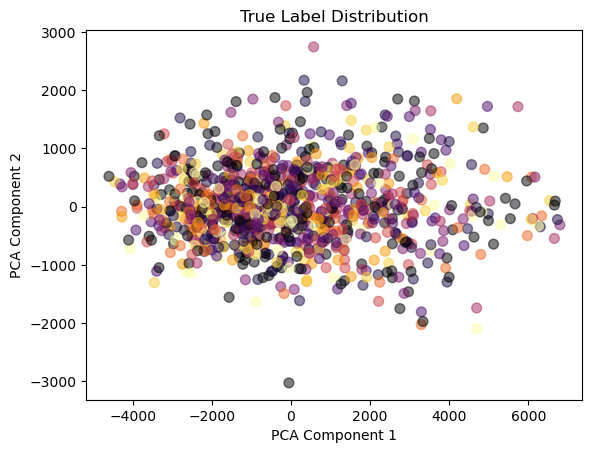

In [56]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Applying PCA
pca = PCA(n_components=2) # Reducing data dimension into 2
X_val_pca = pca.fit_transform(X_val_flat)

# Clustering the reduced data using KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_val_pca)

# Taking a subset of 1000 examples
subset_indices = np.random.choice(X_val_pca.shape[0], 1000, replace=False)
X_val_pca_subset = X_val_pca[subset_indices]
y_val_subset = y_val[subset_indices]
kmeans_labels_subset = kmeans.labels_[subset_indices]

# Plotting and visualizing the clustering result
plt.scatter(X_val_pca_subset[:, 0], X_val_pca_subset[:, 1], c=kmeans_labels_subset, cmap='inferno', marker='o', s=50, alpha=0.5)
plt.title("KMeans Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Visualizing the ground truth
plt.scatter(X_val_pca_subset[:, 0], X_val_pca_subset[:, 1], c=y_val_subset.ravel(), cmap='inferno', marker='o', s=50, alpha=0.5)
plt.title("True Label Distribution")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
